## 1 Linear Least Squares Regression

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
442 10
(442,)


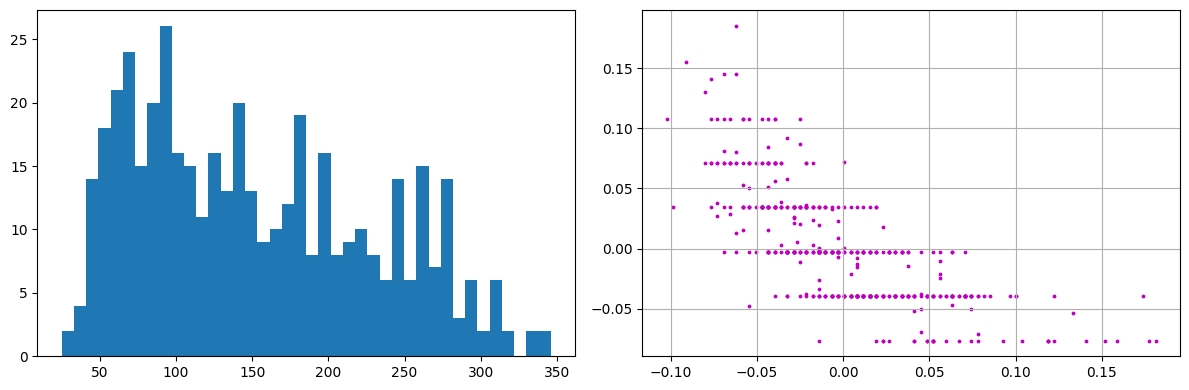

In [24]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
print(X[0])
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,6], X[:,7], c='m', s=3)
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

Text(0.5, 1.0, 't vs t-predicted by pseudo-inverse method')

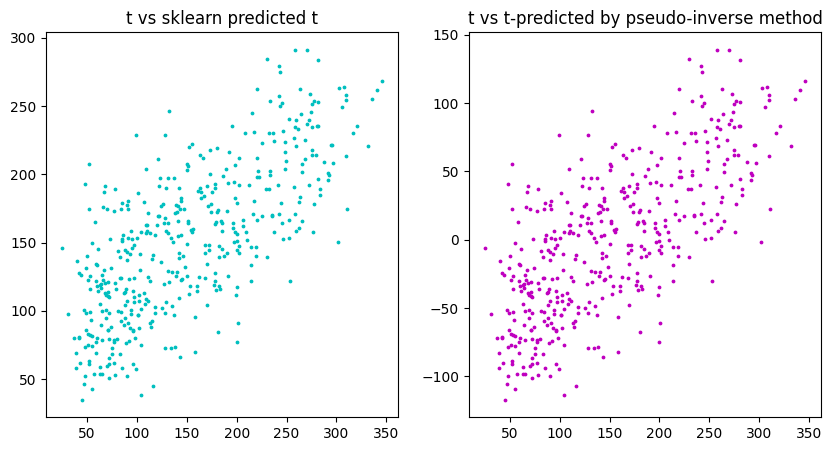

In [41]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[0].set_title("t vs sklearn predicted t")
ax[1].scatter(t, th2, c='m', s=3)
ax[1].set_title("t vs t-predicted by pseudo-inverse method")

## 2 Regularization

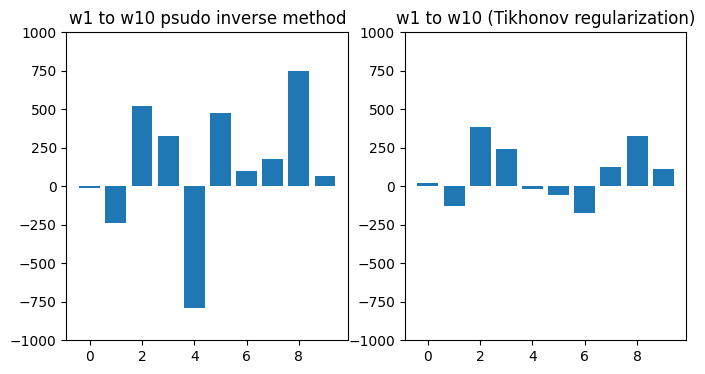

In [43]:
gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].set_ylim(-1000, 1000)
ax[0].set_title("w1 to w10 psudo inverse method")
ax[0].bar(np.arange(len(w)), w)
ax[1].set_ylim(-1000, 1000)
ax[1].set_title("w1 to w10 (Tikhonov regularization)")
ax[1].bar(np.arange(len(w)), wR)
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

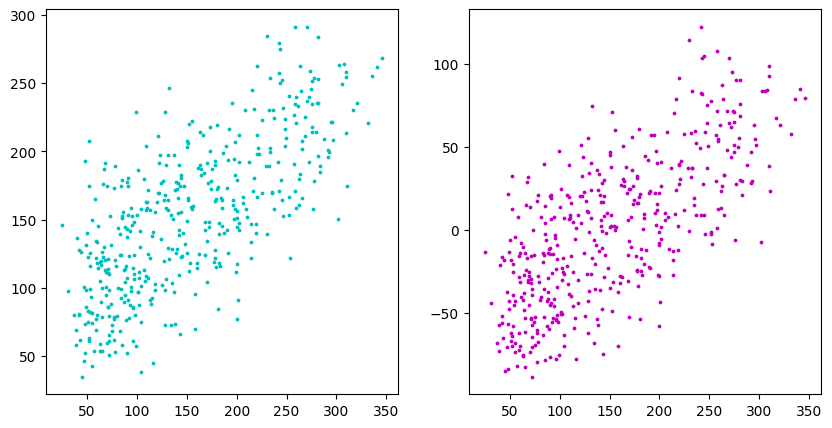

In [29]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution with "Tikhonov regularization" to linear regression
#
th3 = X @ wR
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th3, c='m', s=3)

## Sparse Regression

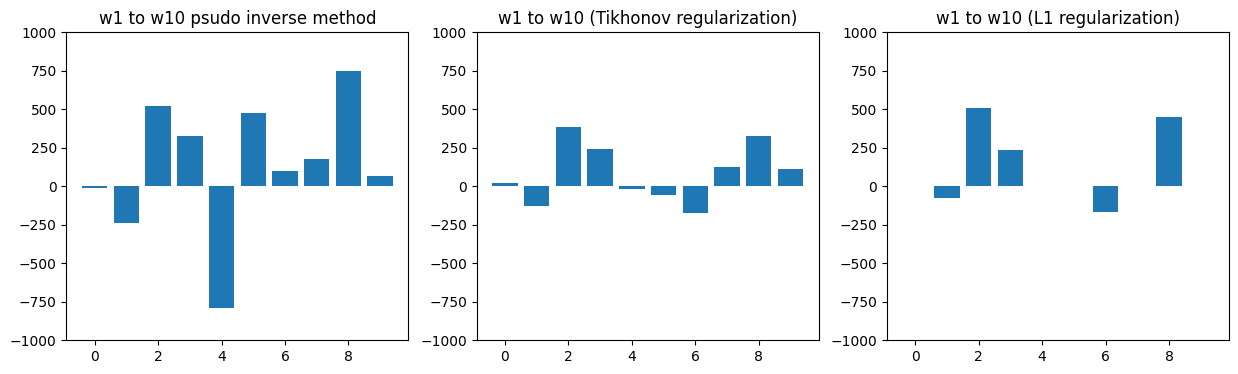

In [46]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)
wP = np.linalg.inv(X.T @ X) @ X.T @ th_lasso
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].set_ylim(-1000, 1000)
ax[0].set_title("w1 to w10 psudo inverse method")
ax[0].bar(np.arange(len(w)), w)
ax[1].set_ylim(-1000, 1000)
ax[1].set_title("w1 to w10 (Tikhonov regularization)")
ax[1].bar(np.arange(len(w)), wR)
ax[2].set_ylim(-1000, 1000)
ax[2].set_title("w1 to w10 (L1 regularization)")
ax[2].bar(np.arange(len(w)), wP)
plt.savefig("solutions.png")


In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))

Text(0, 0.5, 'Regression Coefficients')

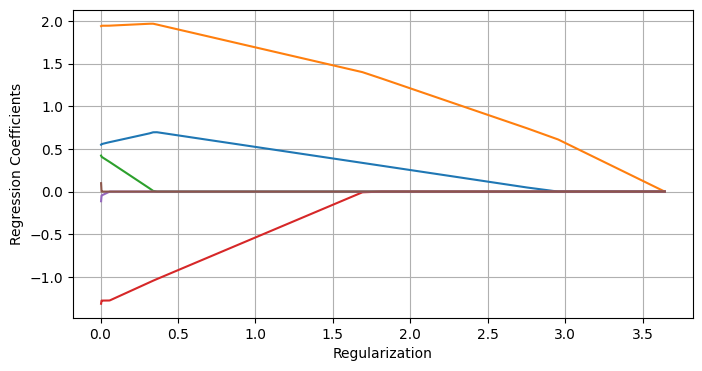

In [54]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)

# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
ax.grid(True)
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")

In [ ]:
import pandas as pd

sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
print(sol.columns)
t = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)
X = sol[colnames[5:len(colnames)]]
N, p = X.shape
print(X.shape)
print(t.shape)
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
# Regularized regression
#
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w.to_numpy()
th_test = X_test @ w.to_numpy()
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c=’m’, s=3)
# ... plots
#
# Over to you for implementing Lasso
